# this model predicts the price of used cars according to diffrent factors!

importing libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

1.loading the data

In [2]:
data = pd.read_csv("cars_data.csv")
#the top 5 rows of the df
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## data preprocessing

Exploring the descriptive statistics of the variables

In [3]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data = data.drop(['Model'], axis = 1)
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [5]:
# data.isnull() # shows a df with the information whether a data point is null 
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
# This will give us the total number of missing values feature-wise
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

removing null values as it is less that 5% of the total data, due to rule of thumb

In [6]:
data = data.dropna(axis = 0)

In [7]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


as shown in count raw, all the counts of the data are the same,

## exploring PDSs

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

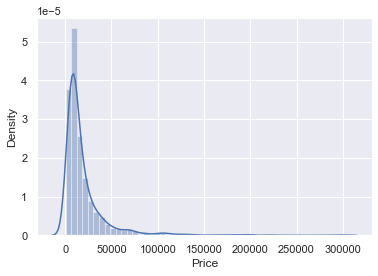

In [8]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data['Price'])

dealing with outliers


In [9]:
q = data['Price'].quantile(0.99)

In [10]:
data_1 = data[data['Price'] <q]

In [11]:
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

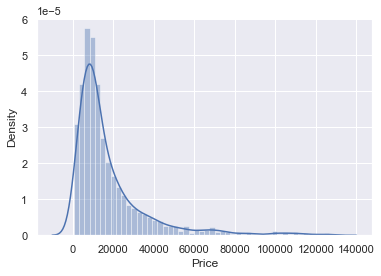

In [12]:
sns.distplot(data_1['Price'])

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

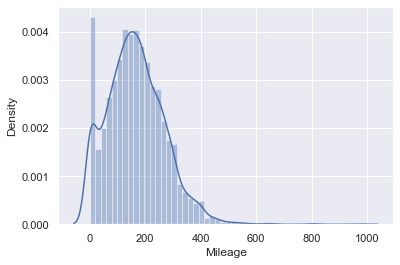

In [13]:
sns.distplot(data_1['Mileage'])

In [14]:
q = data_1['Mileage'].quantile(0.99)

In [15]:
data_2 = data_1[data_1['Mileage']<q]

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

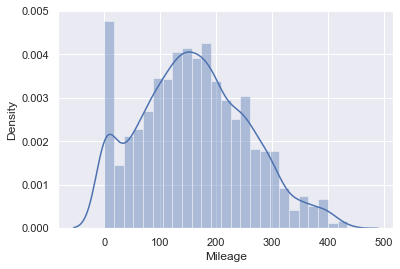

In [16]:
sns.distplot(data_2['Mileage'])

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

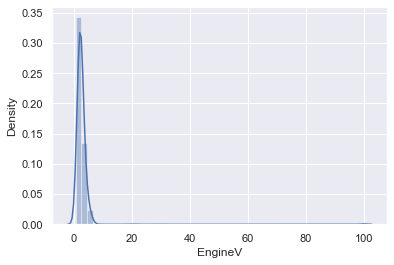

In [17]:
sns.distplot(data_2['EngineV'])

In [18]:
data_3 = data_2[data_2['EngineV']<6.5]

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

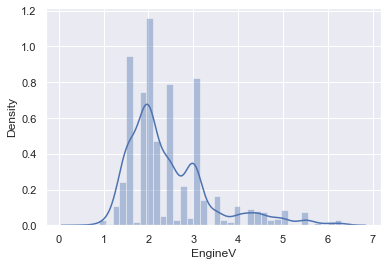

In [19]:
sns.distplot(data_3['EngineV'])

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

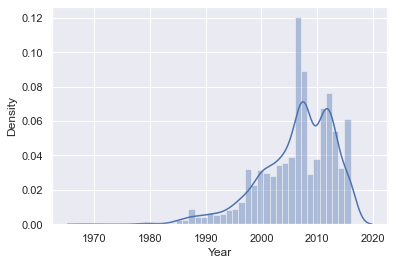

In [20]:
sns.distplot(data_3['Year'])

In [21]:
q = data_3['Year'].quantile(0.1)

In [22]:
data_4 = data_3[data_3['Year']>1970]
# data_4 = data_3[data_3['Year']>1975]


C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

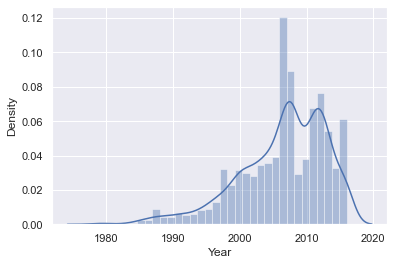

In [23]:
sns.distplot(data_4['Year'])

In [24]:
data = data_4.reset_index(drop=True)

In [25]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3920,3920.000000,3920,3920.000000,3920.000000,3920,3920,3920.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1498,NaN,NaN,1818,3558,NaN
mean,NaN,17984.081878,NaN,161.282653,2.443406,NaN,NaN,2006.415561
std,NaN,19042.148809,NaN,96.080356,0.946302,NaN,NaN,6.569588
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1978.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


## checking ols assumptions

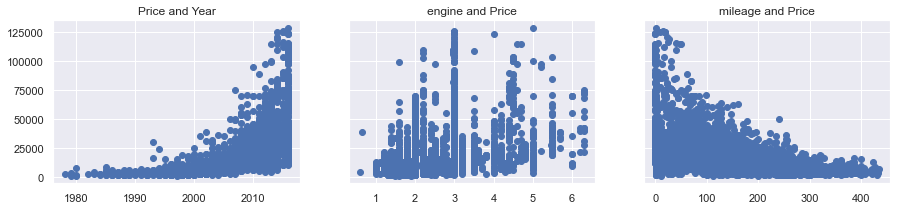

In [26]:
# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them (with your current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey = True , figsize = (15,3))#sharey -> share 'Price' as y
ax1.scatter(data['Year'] , data['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data['EngineV'], data['Price'])
ax2.set_title('engine and Price')
ax3.scatter(data['Mileage'], data['Price'])
ax3.set_title('mileage and Price')
plt.show()

In [27]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data['Price'])
# Then we add it to our data frame
data['log_Price']= log_price
data


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3915,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3916,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3917,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557
3918,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,8.987197


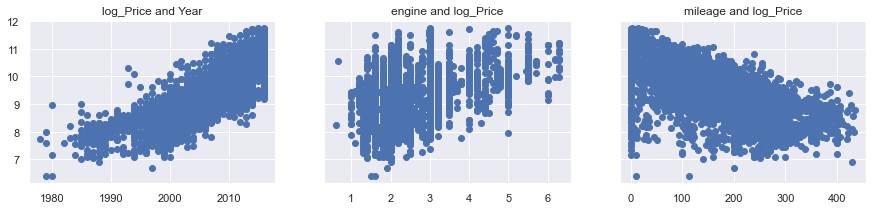

In [28]:
#PLOT WITH LOG OF PRICE
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey = True , figsize = (15,3))#sharey -> share 'Price' as y
ax1.scatter(data['Year'] , data['log_Price'])
ax1.set_title('log_Price and Year')
ax2.scatter(data['EngineV'], data['log_Price'])
ax2.set_title('engine and log_Price')
ax3.scatter(data['Mileage'], data['log_Price'])
ax3.set_title('mileage and log_Price')
plt.show()


now we can se a liner relationship in all 3 plots

In [29]:
data = data.drop(['Price'], axis = 1)

In [30]:
data

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_Price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3915,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3916,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3917,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557
3918,BMW,sedan,194,2.0,Petrol,yes,1985,8.987197


multicolliniarity check:


In [32]:
data.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_Price'], dtype=object)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data[['Mileage','Year','EngineV']]

In [36]:
vif = pd.DataFrame()

In [37]:
vif['VIF'] = [variance_inflation_factor(variables.values, i ) for i in range(variables.shape[1])]

In [38]:
vif['Features'] = variables.columns

In [39]:
vif

,VIF,Features
0,3.790463,Mileage
1,10.394632,Year
2,7.669290,EngineV


In [40]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicollinearity = data.drop(['Year'],axis=1)

create dummy variables
to preprocess all categorical features

In [41]:
data_dummy = pd.get_dummies(data_no_multicollinearity,drop_first = True)

In [42]:
data_dummy

,Mileage,EngineV,log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3916,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3917,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3918,194,2.0,8.987197,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [44]:
variables_dummy = data_dummy[['Brand_BMW' , 'Brand_Mercedes-Benz' , 'Brand_Mitsubishi', 'Brand_Renault' , 'Brand_Toyota' , 'Brand_Volkswagen']]
vif_dummy = pd.DataFrame()

In [45]:
vif_dummy['VIF'] = [variance_inflation_factor(variables_dummy.values, i ) for i in range(variables_dummy.shape[1])]

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [47]:
vif_dummy['Features'] = variables_dummy.columns

In [48]:
vif_dummy

,VIF,Features
0,0.187302,Brand_BMW
1,0.000000,Brand_Mercedes-Benz
2,0.160656,Brand_Mitsubishi
3,0.412844,Brand_Renault
4,0.491054,Brand_Toyota
5,0.109049,Brand_Volkswagen


In [50]:
data_dummy.columns.values

array(['Mileage', 'EngineV', 'log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [52]:
cols = ['log_Price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [53]:
final_data = data_dummy[cols]

In [55]:
final_data

,log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3916,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3917,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3918,8.987197,194,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


# linear regression model 

In [57]:
#target is log price
target = final_data['log_Price']
inputs = final_data.drop(['log_Price'], axis = 1)

scaling the data


In [58]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [59]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

train, test and split

In [60]:
# Import the module for the split
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test = train_test_split(inputs_scaled,target,test_size = 0.2,random_state=365)

create the regression

In [62]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [63]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

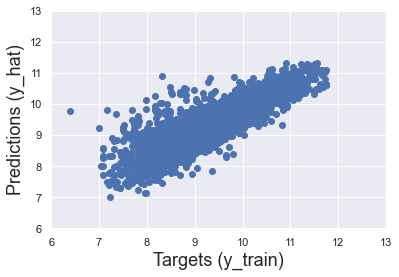

In [66]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train,y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

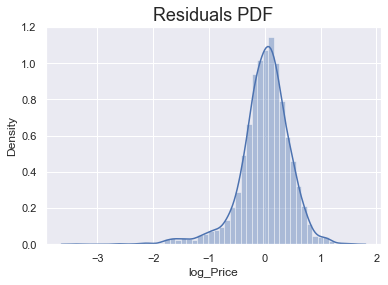

In [67]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model

In [68]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# Note that this is NOT the adjusted R-squared
# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.7400068462570588

In [106]:
inputs.columns

Index(['Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [107]:
inputs

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3916,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3917,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
3918,194,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [111]:
x_new = pd.DataFrame({'Mileage':[99] ,'EngineV':[2.5] , 'Brand_BMW' : [0],'Brand_Mercedes-Benz': [1] ,'Brand_Mitsubishi':[0],
'Brand_Renault':[0],'Brand_Toyota': [0]  , 'Brand_Volkswagen':[0]  , 'Body_hatch' :[0] , 'Body_other': [0] , 'Body_sedan':[1] ,
'Body_vagon':[0] , 'Body_van':[0] , 'Engine Type_Gas' :[1],
'Engine Type_Other':[0], 'Engine Type_Petrol':[0], 'Registration_yes':[1] })

In [112]:
x_new

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,99,2.5,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1


In [121]:
scaler.fit(x_new)

StandardScaler()

In [122]:
x_scaled = scaler.transform(x_new)

In [123]:
x_scaled

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

In [124]:
y_pred = reg.predict(x_scaled)
print(np.exp(y_pred))


[12022.86745248]


# the prediction for such a car is 12,022 USD

finding weights and bias

In [69]:
# Obtain the bias (intercept) of the regression
reg.intercept_

9.394565736417933

In [70]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable if at all

array([-0.46616709,  0.22648636,  0.01762355,  0.00740655, -0.12760288,
       -0.17458568, -0.05664382, -0.08939368, -0.15751762, -0.10492303,
       -0.20419713, -0.12995513, -0.15374739, -0.12901571, -0.0276273 ,
       -0.15068186,  0.30564701])

In [71]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.466167
1,EngineV,0.226486
2,Brand_BMW,0.017624
3,Brand_Mercedes-Benz,0.007407
4,Brand_Mitsubishi,-0.127603
5,Brand_Renault,-0.174586
6,Brand_Toyota,-0.056644
7,Brand_Volkswagen,-0.089394
8,Body_hatch,-0.157518
9,Body_other,-0.104923


testing

In [73]:
y_hat_test = reg.predict(x_test)

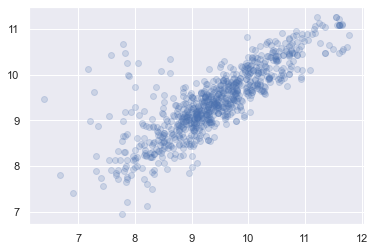

In [78]:
plt.scatter(y_test,y_hat_test, alpha = 0.2)

In [98]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test) , columns = ['Prediction'])

In [99]:
df_pf

,Prediction
0,52487.914835
1,9278.593572
2,18862.594083
3,10870.554377
4,18037.162787
...,...
779,23244.225004
780,17365.406542
781,2983.876850
782,32005.415924


In [100]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,52487.914835,51000.0
1,9278.593572,8900.0
2,18862.594083,17800.0
3,10870.554377,13900.0
4,18037.162787,10600.0
...,...,...
779,23244.225004,21800.0
780,17365.406542,24000.0
781,2983.876850,3100.0
782,32005.415924,23500.0


In [101]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop = True)

# Check the result
y_test.head()

0    10.839581
1     9.093807
2     9.786954
3     9.539644
4     9.268609
Name: log_Price, dtype: float64

In [102]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,52487.914835,51000.0
1,9278.593572,8900.0
2,18862.594083,17800.0
3,10870.554377,13900.0
4,18037.162787,10600.0
...,...,...
779,23244.225004,21800.0
780,17365.406542,24000.0
781,2983.876850,3100.0
782,32005.415924,23500.0
